In [5]:
import os
import torch
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [6]:
# GPU
n_gpu = torch.cuda.device_count()
print("n_gpu: ", n_gpu)

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"

if n_gpu == 0:
    print("Warning: There\'s no GPU available on this machine")
    device = 'cpu'
else:
    print("Visible devices: ", os.environ["CUDA_VISIBLE_DEVICES"])
    device = 'cuda:0'
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("Default tensor type set to torch.cuda.FloatTensor")

print("Device: ", device)

n_gpu:  0
Device:  cpu


In [7]:
filepath_real = 'embeddings/real/openl3_embeddings_zapsplat_pack_footsteps_high_heels_1s_aligned.csv'
filepath_wave = 'embeddings/2021-09-20_19h46m-wave/120k_large_openl3_embeddings_synth.csv'
filepath_hifi = 'embeddings/2021-09-20_13h23m-hifi/120k_large_openl3_embeddings_synth.csv'

df_real = pd.read_csv(filepath_real)
df_wave = pd.read_csv(filepath_wave)
df_hifi = pd.read_csv(filepath_hifi)

df_all = pd.concat(
    [
        pd.read_csv(filepath_real), 
        pd.read_csv(filepath_wave),
        pd.read_csv(filepath_hifi)
    ]
)

feat_cols = [ 'openl3_'+str(i) for i in range(0,512) ]

df_all[:2]

,class,filename,openl3_0,openl3_1,openl3_2,openl3_3,openl3_4,openl3_5,openl3_6,openl3_7,...,openl3_502,openl3_503,openl3_504,openl3_505,openl3_506,openl3_507,openl3_508,openl3_509,openl3_510,openl3_511
0,carpet,zapsplat_foley_footstep_single_heel_stiletto_s...,2.417683,1.442889,1.842128,1.735474,1.828430,1.427105,1.866951,0.597816,...,1.654869,1.110859,0.732269,1.103394,2.414008,1.309057,1.658940,2.521504,3.395580,2.687181
1,carpet,zapsplat_foley_footstep_single_heel_stiletto_s...,2.184573,1.442889,2.061893,1.786589,1.367012,1.191620,2.017092,1.235374,...,1.758343,1.110859,0.631619,1.114269,2.352958,1.165961,1.473607,2.439668,3.758582,2.645454


In [8]:
print(df_all.shape)
print(df_real.shape)
print(df_wave.shape)
print(df_hifi.shape)

(14081, 514)
(81, 514)
(7000, 514)
(7000, 514)


In [9]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_all[feat_cols].values)
df_all['pca-1'] = pca_result[:,0]
df_all['pca-2'] = pca_result[:,1] 
df_all['pca-3'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.15722109 0.12454153 0.09197675]


In [10]:
df_all[7081:14081].shape

(7000, 517)

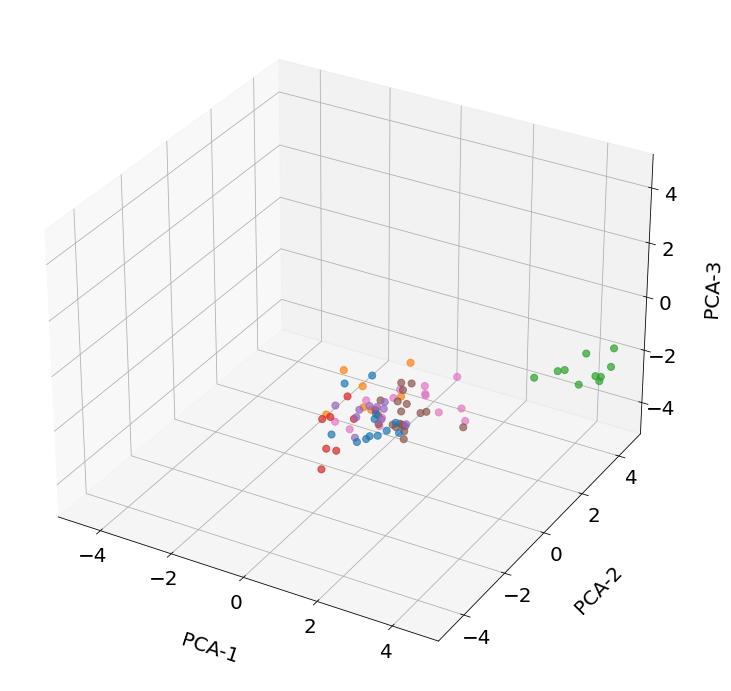

In [34]:
# PLOT ONLY REAL SAMPLES

cmap7 = ListedColormap(sns.color_palette("tab10", 7).as_hex())

df_subset = df_all[:81]

# uncomment this to rotate 3d plots (works only on browser, not on vscode)
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("PCA-1", labelpad=30)
ax.set_ylabel("PCA-2", labelpad=30)
ax.set_zlabel("PCA-3", labelpad=20)

classes = sorted(set(df_subset['class']))
for i, c in enumerate(classes):
    ax.scatter(
        xs=df_subset[df_subset['class'] == c]['pca-1'], 
        ys=df_subset[df_subset['class'] == c]['pca-2'], 
        zs=df_subset[df_subset['class'] == c]['pca-3'],
        c=cmap7.colors[i], 
        label=c, 
        alpha=0.7,
        s=50)
# ax.legend(loc=2, prop={'size': 14})
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
plt.tight_layout()

# plt.savefig('%s/%s' % ('pca_plots', 'real_3d_openl3_embs_same axes.jpg'), format='jpg', dpi=500, bbox_inches='tight', pad_inches=-0.0)

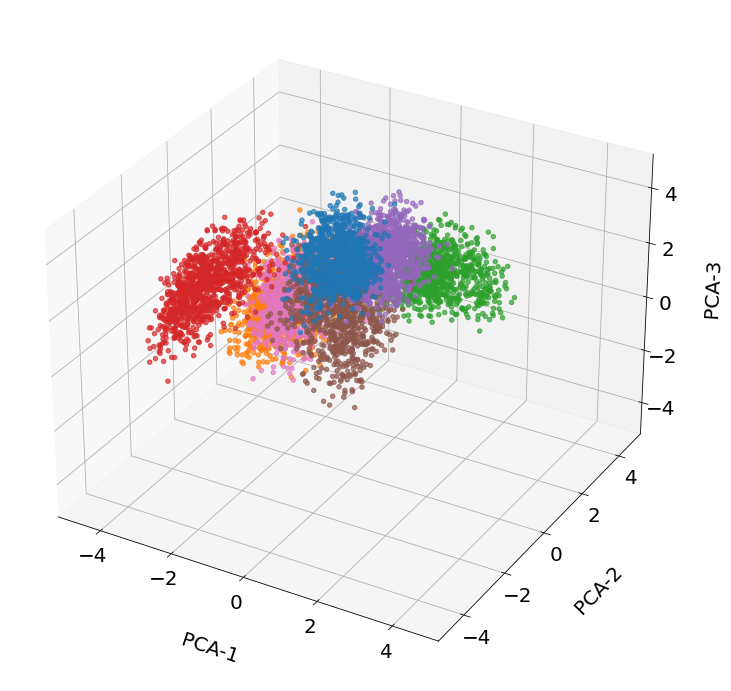

In [36]:
# PLOT ONLY WAVE SAMPLES

cmap7 = ListedColormap(sns.color_palette("tab10", 7).as_hex())

df_subset = df_all[81:7081]

# uncomment this to rotate 3d plots (works only on browser, not on vscode)
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("PCA-1", labelpad=30)
ax.set_ylabel("PCA-2", labelpad=30)
ax.set_zlabel("PCA-3", labelpad=20)

classes = sorted(set(df_subset['class']))
for i, c in enumerate(classes):
    ax.scatter(
        xs=df_subset[df_subset['class'] == c]['pca-1'], 
        ys=df_subset[df_subset['class'] == c]['pca-2'], 
        zs=df_subset[df_subset['class'] == c]['pca-3'],
        c=cmap7.colors[i], 
        label=c, 
        alpha=0.7,
        s=20)
# ax.legend(loc=2, prop={'size': 14})
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
plt.tight_layout()

# plt.savefig('%s/%s' % ('pca_plots', 'wave_3d_openl3_embs_same axes.jpg'), format='jpg', dpi=500, bbox_inches='tight', pad_inches=-0.0)

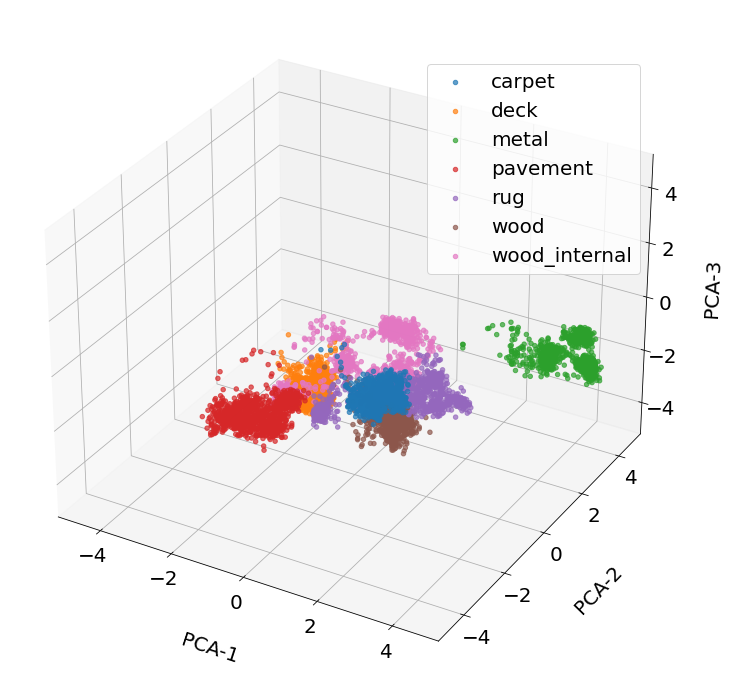

In [37]:
# PLOT ONLY HIFI SAMPLES

cmap7 = ListedColormap(sns.color_palette("tab10", 7).as_hex())

df_subset = df_all[7081:14081]

# uncomment this to rotate 3d plots (works only on browser, not on vscode)
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 20})
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("PCA-1", labelpad=30)
ax.set_ylabel("PCA-2", labelpad=30)
ax.set_zlabel("PCA-3", labelpad=20)

classes = sorted(set(df_subset['class']))
for i, c in enumerate(classes):
    ax.scatter(
        xs=df_subset[df_subset['class'] == c]['pca-1'], 
        ys=df_subset[df_subset['class'] == c]['pca-2'], 
        zs=df_subset[df_subset['class'] == c]['pca-3'],
        c=cmap7.colors[i], 
        label=c, 
        alpha=0.7,
        s=20)
ax.legend(bbox_to_anchor=(0.95, 0.93), loc="upper right")
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([-5,5])
plt.tight_layout()

# plt.savefig('%s/%s' % ('pca_plots', 'hifi_3d_openl3_embs_same axes.jpg'), format='jpg', dpi=500, bbox_inches='tight', pad_inches=-0.0)